<a href="https://colab.research.google.com/github/fegastal/PosTech-DataAnalytics_TechChallenge/blob/main/Modulo04v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install xgboost

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt

In [31]:
#planilha - salvei no nosso git
dados = pd.read_excel('/content/base_brent.xlsx', parse_dates=['date'])

In [32]:
# Nem precisava, pq está correto, mas fiz por boa prática
dados.sort_values(by='date', inplace=True)

In [44]:
# CNem precisava, pq está correto, mas fiz por boa prática
dados['ano'] = dados['date'].dt.year
dados['mes'] = dados['date'].dt.month
dados['dia_da_semana'] = dados['date'].dt.dayofweek

In [45]:
# Dividir os dados em conjuntos de treinamento e teste
X = dados[['ano', 'mes', 'dia_da_semana']]
# Utilizar 'price' como o nome da coluna de destino
y = dados['price']

In [46]:
# Escolhi último dia da amostrar como data de corte para treinamento/teste
data_corte = pd.to_datetime('2024-01-16')  # Substitua pela data desejada


In [47]:
# Dividir os dados em treinamento e teste
X_train = X[dados['date'] < data_corte]
y_train = y[dados['date'] < data_corte]
X_test = X[dados['date'] >= data_corte]
y_test = y[dados['date'] >= data_corte]

In [53]:
# modelo XGBoost com ajustes nos parâmetros - mesmo que usamos no passado
modelo = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,  # número de estimadores
    learning_rate=0.05,  # Ajuste a taxa de aprendizado
    max_depth=6,  # Ajuste a profundidade máxima da árvore
)
modelo.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
# Preços para 31 de dezembro de 2024
data_dez_2024 = pd.DataFrame({'ano': [2024], 'mes': [12], 'dia_da_semana': [3]})  # Assumindo quinta-feira (dia 3) para 31 de dezembro
previsao_dez_2024 = modelo.predict(data_dez_2024)

In [55]:
# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, previsoes)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.32981655011185723


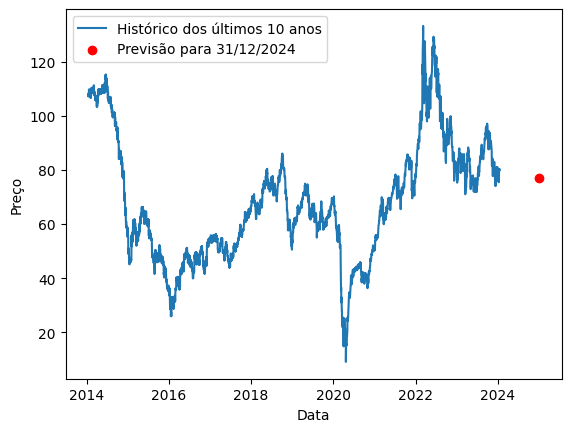

Previsão para 31/12/2024: 77.00753784179688


In [58]:
# Exibir o preço histórico dos últimos 10 anos (usei um tempo que acho suficiente)
historico_10_anos = dados[dados['date'] >= (dados['date'].max() - pd.DateOffset(years=10))]

# Mostrar a previsão: utilizei um ponto vermelho
plt.plot(historico_10_anos['date'], historico_10_anos['price'], label='Histórico dos últimos 10 anos')
plt.scatter(pd.to_datetime('2024-12-31'), previsao_dez_2024, color='red', label='Previsão para 31/12/2024', marker='o')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()

# Exibir valor exato da previsão
print(f'Previsão para 31/12/2024: {previsao_dez_2024[0]}')